# Dataset formation 
Now that we finally have the data, let's form ourselves a neat table!

In [2]:
import json
import rasterio as rio 
import pandas as pd
import numpy as np 
import os
import rasterio.mask
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box
from collections import defaultdict
from datetime import datetime
from rasterio.plot import show

In [5]:
with open('data/id_list.json', 'r') as f:
  id_list = json.load(f)

print(type(id_list))

<class 'dict'>


In [6]:
image_info = pd.DataFrame(id_list)
# image_info['date'] = image_info['id'].apply(lambda x: datetime.strptime(x.split('_')[-1], "%Y%m%d"))
# image_info.sort_values('date', inplace=True)


In [39]:
# lets save it as json
image_info.to_json('data/id_list.json')

In [37]:
image_info.loc[image_info['id'] == 'LC08_184030_20220414', 'ghs'] = 'JRC/GHSL/P2023A/GHS_POP/2020'



In [12]:
image_info.tail()

,id,collection,tier,season,date,ghs
35,LC08_184030_20220225,LC08,T1,winter,2022-02-25,JRC/GHSL/P2023A/GHS_POP/2020
30,LC08_184030_20220414,LC08,T1,spring,2022-04-14,JRC/GHSL/P2023A/GHS_POP/2020
28,LC08_184030_20221007,LC08,T1,autumn,2022-10-07,JRC/GHSL/P2023A/GHS_POP/2020
36,LC08_184030_20221226,LC08,T1,winter,2022-12-26,JRC/GHSL/P2023A/GHS_POP/2020
32,LC08_184030_20230722,LC08,T1,summer,2023-07-22,JRC/GHSL/P2023A/GHS_POP/2025


In [11]:
image_info = pd.DataFrame(id_list)
image_info['date'] = image_info['id'].apply(lambda x: datetime.strptime(x.split('_')[-1], "%Y%m%d"))
image_info = image_info[['id', 'collection', 'tier', 'season', 'date', 'ghs']]

In [21]:
image_info.sort_values('date', axis=0, ascending=True)

,id,collection,tier,season,date,ghs
0,LT05_184030_19990415,LT05,T1,spring,1999-04-15,JRC/GHSL/P2023A/GHS_POP/2000
1,LE07_184030_19990930,LE07,T1,autumn,1999-09-30,JRC/GHSL/P2023A/GHS_POP/2000
2,LE07_184030_20000527,LE07,T1,spring,2000-05-27,JRC/GHSL/P2023A/GHS_POP/2000
3,LE07_184030_20000612,LE07,T1,summer,2000-06-12,JRC/GHSL/P2023A/GHS_POP/2000
4,LE07_184030_20000628,LE07,T1,summer,2000-06-28,JRC/GHSL/P2023A/GHS_POP/2000
5,LE07_184030_20010919,LE07,T1,autumn,2001-09-19,JRC/GHSL/P2023A/GHS_POP/2000
6,LT05_184030_20050210,LT05,T1,winter,2005-02-10,JRC/GHSL/P2023A/GHS_POP/2005
7,LT05_184030_20060504,LT05,T1,spring,2006-05-04,JRC/GHSL/P2023A/GHS_POP/2005
8,LT05_184030_20060520,LT05,T1,spring,2006-05-20,JRC/GHSL/P2023A/GHS_POP/2005
9,LT05_184030_20061027,LT05,T1,autumn,2006-10-27,JRC/GHSL/P2023A/GHS_POP/2005


In [9]:
def flatten_image(image_path, season):
    with rio.open(image_path) as src:
        image = src.read()
        image = np.moveaxis(image, 0, -1)
        image = image.reshape(-1, image.shape[-1])
        image = np.c_[image, np.repeat(season, image.shape[0])]

        return image

In [43]:
test = flatten_image('data/images/LC08_184030_20140323.tif', 'spring')
print(test)

[['nan' 'nan' 'nan' ... 'nan' 'nan' 'spring']
 ['nan' 'nan' 'nan' ... 'nan' 'nan' 'spring']
 ['nan' 'nan' 'nan' ... 'nan' 'nan' 'spring']
 ...
 ['nan' 'nan' 'nan' ... 'nan' 'nan' 'spring']
 ['nan' 'nan' 'nan' ... 'nan' 'nan' 'spring']
 ['nan' 'nan' 'nan' ... 'nan' 'nan' 'spring']]


In [44]:
def get_band_names(image_path):
    with rio.open(image_path) as src:
        return src.descriptions

In [45]:
get_band_names('data/images/LC08_184030_20140323.tif')

('NDBI', 'MNDWI', 'NDWI', 'NDVI', 'SAVI', 'population_count', 'LST')

In [11]:
# ds = pd.DataFrame(columns=['NDBI', 'NDBaI',	'MNDWI',
#                            'NDWI',	'NDVI',	'EVI',	'SAVI',
#                            'population_count', 'LST', 'season'])

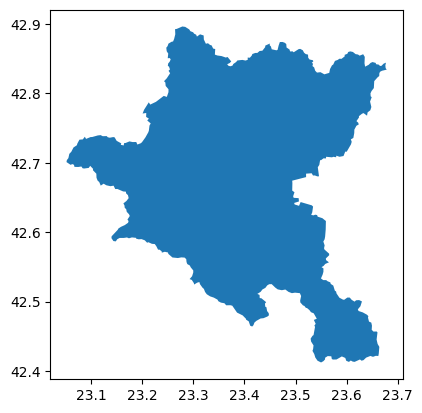

In [46]:
# let's cut each raster according to the sofia boundaries shapefile so as to decrease the size of the dataset


sofia = gpd.read_file('shapefiles/sofia-boundaries.json')

sofia.plot()
plt.show()


In [69]:
# raster = rio.open('data/images/LC08_184030_20140323.tif')
raster = rio.open('./data/clipped/LT05_184030_19990415.tif')

In [70]:
raster.crs

CRS.from_epsg(32634)

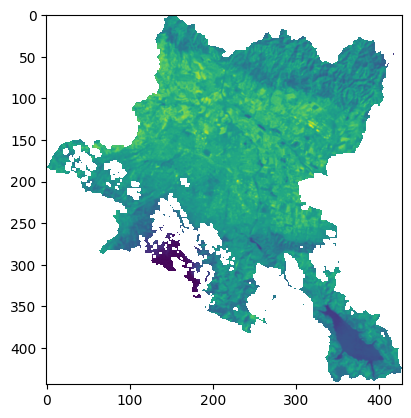

<Axes: >

In [71]:
show(raster.read(7), cmap='viridis')

In [49]:
# sofia_zoomed = gpd.read_file('shapefiles/closeup.geojson')
# sofia_zoomed.plot()
# sofia_zoomed.to_crs(raster.crs, inplace=True)
# plt.show()

In [51]:
# sofia_zoomed.crs

In [52]:
# sofia_zoomed.to_file('shapefiles/closeup.geojson', driver='GeoJSON')

In [66]:
# now we clip 

def clip_raster(image_path, shapefile_path):
    with rio.open(image_path) as src:
        out_image, out_transform = rio.mask.mask(src, shapefile_path, crop=True, nodata=np.nan)
        out_meta = src.meta.copy()
        print(out_image.shape)
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})
        return out_image, out_meta
with rio.open('data/images/LC08_184030_20141001.tif') as src:
    print(src.crs)
    sofia = sofia.to_crs(src.crs)
    # sofia_zoomed = sofia_zoomed.to_crs(src.crs)

# out_image, out_meta = clip_raster('data/images/LC08_184030_20141001.tif', sofia.geometry)


EPSG:32634


In [68]:
import os
import rasterio as rio


output_dir = './data/clipped/'
os.makedirs(output_dir, exist_ok=True)
# shapefile = sofia.geometry
shapefile = sofia.geometry

for i, row in image_info.iterrows():
    image_path = f'data/images/{row["id"]}.tif'
        
    out_image, out_meta = clip_raster(image_path, shapefile)
    src_meta = rio.open(image_path).meta
    out_meta.update(src_meta)
    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_meta["transform"]})

    output_file = f'{output_dir}{row["id"]}.tif'
    with rio.open(output_file, 'w', **out_meta) as dst:
        dst.write(out_image)
    
    print(f'Image {row["id"]} clipped and saved to {output_file}')

(7, 444, 427)
Image LT05_184030_19990415 clipped and saved to ./data/clipped/LT05_184030_19990415.tif
(7, 444, 427)
Image LE07_184030_19990930 clipped and saved to ./data/clipped/LE07_184030_19990930.tif
(7, 444, 427)
Image LE07_184030_20000527 clipped and saved to ./data/clipped/LE07_184030_20000527.tif
(7, 444, 427)
Image LE07_184030_20000612 clipped and saved to ./data/clipped/LE07_184030_20000612.tif
(7, 444, 427)
Image LE07_184030_20000628 clipped and saved to ./data/clipped/LE07_184030_20000628.tif
(7, 444, 427)
Image LE07_184030_20010919 clipped and saved to ./data/clipped/LE07_184030_20010919.tif
(7, 444, 427)
Image LT05_184030_20050210 clipped and saved to ./data/clipped/LT05_184030_20050210.tif
(7, 444, 427)
Image LT05_184030_20060504 clipped and saved to ./data/clipped/LT05_184030_20060504.tif
(7, 444, 427)
Image LT05_184030_20060520 clipped and saved to ./data/clipped/LT05_184030_20060520.tif
(7, 444, 427)
Image LT05_184030_20061027 clipped and saved to ./data/clipped/LT05_

In [74]:
# # and we now we are going to make a dataset from the clipped images

# ds_clipped = pd.DataFrame(columns=['NDBI', 'MNDWI', 'NDWI',	'NDVI',	'SAVI',
#                                     'population_count', 'LST', 'season'])

# data_frames = []

# for i, row in image_info.iterrows():
#     image_path = f'data/clipped/{row["id"]}.tif'
#     season = row['season']
#     image = flatten_image(image_path, season)
#     data_frames.append(pd.DataFrame(image, columns=ds_clipped.columns))

# ds_clipped = pd.concat(data_frames, ignore_index=True)


In [13]:
# and we now we are going to make a dataset from the clipped images

ds_clipped_date = pd.DataFrame(columns=['NDBI',	'MNDWI',
                                        'NDWI',	'NDVI', 'SAVI',
                                        'population_count', 'LST', 'season', 'year'])

data_frames = []

for i, row in image_info.iterrows():
    image_path = f'data/clipped/{row["id"]}.tif'
    season = row['season']
    date = row['date']
    image = flatten_image(image_path, season)
    image = np.c_[image, np.repeat(date.year, image.shape[0])]
    data_frames.append(pd.DataFrame(image, columns=ds_clipped_date.columns))

ds_clipped_date = pd.concat(data_frames, ignore_index=True)


In [14]:
ds_clipped_date.replace("nan", np.nan, inplace=True)

In [15]:
ds_clipped_date.dropna(inplace=True)

In [16]:
ds_clipped_date.to_csv('data/dataset_clipped_date.csv', index=False)

In [17]:
ds_clipped_date.head()

,NDBI,MNDWI,NDWI,NDVI,SAVI,population_count,LST,season,year
150,0.0732283,-0.24652714,-0.17648488,0.13534422,0.20301236,0.0,21.731094,spring,1999
151,0.05299415,-0.21112579,-0.1599209,0.13017042,0.19525145,0.0,20.305779,spring,1999
575,0.025999613,-0.16426286,-0.13885626,0.120931886,0.1813938,0.0,18.169518,spring,1999
576,0.0383972,-0.17844507,-0.14101407,0.12074084,0.18110725,0.0,17.297922,spring,1999
577,0.016286645,-0.15161839,-0.13566676,0.11565786,0.17348267,0.0,17.000553,spring,1999


In [19]:
ds_clipped_date.describe()

,NDBI
count,3.249115e+06
mean,-7.842162e-02
std,1.161642e-01
min,-7.521145e-01
25%,-1.540851e-01
50%,-6.150278e-02
75%,6.924128e-03
max,3.590343e-01


In [20]:
import pandas as pd

print("Column types before conversion:")
print(ds_clipped_date.dtypes)

columns_to_convert = ['NDBI', 'MNDWI', 'NDWI', 'NDVI', 'SAVI', 'population_count', 'LST']
for column in columns_to_convert:
    ds_clipped_date[column] = pd.to_numeric(ds_clipped_date[column], errors='coerce')

print("\nColumn types after conversion:")
print(ds_clipped_date.dtypes)

print("\nMissing values in each column:")
print(ds_clipped_date.isnull().sum())

ds_clipped_date_clean = ds_clipped_date.dropna()

summary_stats = ds_clipped_date_clean.describe()
print("\nSummary statistics:")
print(summary_stats)

Column types before conversion:
NDBI                float64
MNDWI                object
NDWI                 object
NDVI                 object
SAVI                 object
population_count     object
LST                  object
season               object
year                 object
dtype: object

Column types after conversion:
NDBI                float64
MNDWI               float64
NDWI                float64
NDVI                float64
SAVI                float64
population_count    float64
LST                 float64
season               object
year                 object
dtype: object

Missing values in each column:
NDBI                0
MNDWI               0
NDWI                0
NDVI                0
SAVI                0
population_count    0
LST                 0
season              0
year                0
dtype: int64

Summary statistics:
               NDBI         MNDWI          NDWI          NDVI          SAVI  \
count  3.249115e+06  3.249115e+06  3.249115e+06  3.249115e+06

In [22]:
ds_clipped_date_clean.columns

Index(['NDBI', 'MNDWI', 'NDWI', 'NDVI', 'SAVI', 'population_count', 'LST',
       'season', 'year'],
      dtype='object')

In [23]:
ds_clipped_date_encoded = pd.get_dummies(ds_clipped_date_clean, columns=['season'], prefix='season')

In [24]:
ds_clipped_date_encoded.head()

,NDBI,MNDWI,NDWI,NDVI,SAVI,population_count,LST,year,season_autumn,season_spring,season_summer,season_winter
150,0.073228,-0.246527,-0.176485,0.135344,0.203012,0.0,21.731094,1999,False,True,False,False
151,0.052994,-0.211126,-0.159921,0.130170,0.195251,0.0,20.305779,1999,False,True,False,False
575,0.026000,-0.164263,-0.138856,0.120932,0.181394,0.0,18.169518,1999,False,True,False,False
576,0.038397,-0.178445,-0.141014,0.120741,0.181107,0.0,17.297922,1999,False,True,False,False
577,0.016287,-0.151618,-0.135667,0.115658,0.173483,0.0,17.000553,1999,False,True,False,False


In [25]:
ds_clipped_date_encoded.to_csv('data/dataset_clipped_date_clean_encoded.csv', index=False)

In [3]:
#ds_clipped.to_csv('data/dataset_clipped.csv', index=False)
ds_clipped = pd.read_csv('data/dataset_clipped_date_clean_encoded.csv')

In [4]:
ds_clipped.head()

,NDBI,MNDWI,NDWI,NDVI,SAVI,population_count,LST,year,season_autumn,season_spring,season_summer,season_winter
0,0.073228,-0.246527,-0.176485,0.135344,0.203012,0.0,21.731094,1999,False,True,False,False
1,0.052994,-0.211126,-0.159921,0.130170,0.195251,0.0,20.305779,1999,False,True,False,False
2,0.026000,-0.164263,-0.138856,0.120932,0.181394,0.0,18.169518,1999,False,True,False,False
3,0.038397,-0.178445,-0.141014,0.120741,0.181107,0.0,17.297922,1999,False,True,False,False
4,0.016287,-0.151618,-0.135667,0.115658,0.173483,0.0,17.000553,1999,False,True,False,False


In [27]:
# ds_clipped = ds_clipped.replace("nan", np.nan)

In [28]:
# ds_clipped = ds_clipped.dropna()

In [6]:
# print(ds_clipped.shape)
# ds_clipped.replace('nan', np.nan, inplace=True)

In [28]:
#ds_clipped.dropna(inplace=True)
ds_clipped.shape

(3249115, 12)

In [34]:
ds_clipped['season_summer'].value_counts()

season_summer
False    2335916
True      913199
Name: count, dtype: int64

In [40]:
ds_clipped['season_autumn'].value_counts()

season_autumn
False    2321425
True      927690
Name: count, dtype: int64

In [41]:
ds_clipped['season_winter'].value_counts()

season_winter
False    2705984
True      543131
Name: count, dtype: int64

In [42]:
ds_clipped['season_spring'].value_counts()

season_spring
False    2384020
True      865095
Name: count, dtype: int64

In [43]:
# # lets encode the season column as a categorical variable
# ds_clipped = ds_clipped.join(pd.get_dummies(ds_clipped['season'], prefix='season'))
# ds_clipped.drop('season', axis=1, inplace=True) 


In [44]:
ds_clipped.head()

,NDBI,MNDWI,NDWI,NDVI,SAVI,population_count,LST,year,season_autumn,season_spring,season_summer,season_winter
0,0.073228,-0.246527,-0.176485,0.135344,0.203012,0.0,21.731094,1999,False,True,False,False
1,0.052994,-0.211126,-0.159921,0.130170,0.195251,0.0,20.305779,1999,False,True,False,False
2,0.026000,-0.164263,-0.138856,0.120932,0.181394,0.0,18.169518,1999,False,True,False,False
3,0.038397,-0.178445,-0.141014,0.120741,0.181107,0.0,17.297922,1999,False,True,False,False
4,0.016287,-0.151618,-0.135667,0.115658,0.173483,0.0,17.000553,1999,False,True,False,False


In [45]:
# ds_clipped.to_csv('data/dataset_nominal.csv', index=False)

In [51]:
corr_table = ds_clipped.drop('year', axis=1)

### Correlation by season

In [54]:
#let's leave only the summer season

temp = corr_table[ds_clipped['season_summer'] == 1]
summer = temp.drop('season_summer', axis=1)
summer.drop('season_autumn', axis=1, inplace=True)
summer.drop('season_spring', axis=1, inplace=True)
summer.drop('season_winter', axis=1, inplace=True)

In [14]:
def plot_correlation(ds=ds_clipped, season=None):
    ds = ds.drop('year', axis=1)
    if season:
        ds = ds[ds[f'season_{season}'] == 1]
        ds = ds.drop([col for col in ds.columns if 'season_' in col], axis=1)
    
    corr = ds.corr()
    plt.figure(figsize=(12, 12))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Correlation Matrix for {season.capitalize() if season else "All Seasons"}')
    plt.show()
    
    # Save the correlation matrix to a CSV file
    corr.to_csv(f'stats/correlation_matrix_{season if season else "all_seasons"}.csv')

In [13]:
plot_correlation(ds_clipped, "summer")

KeyError: "['yeat'] not found in axis"

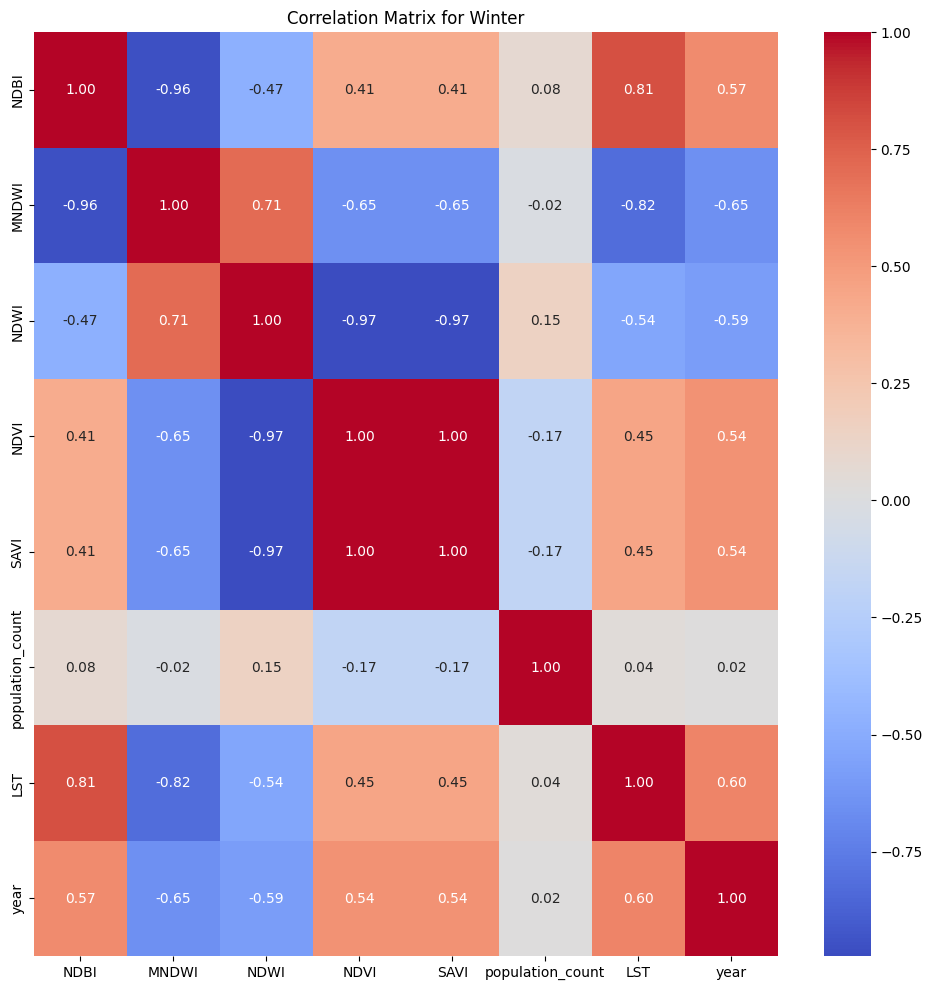

In [9]:
plot_correlation(ds_clipped, "winter")


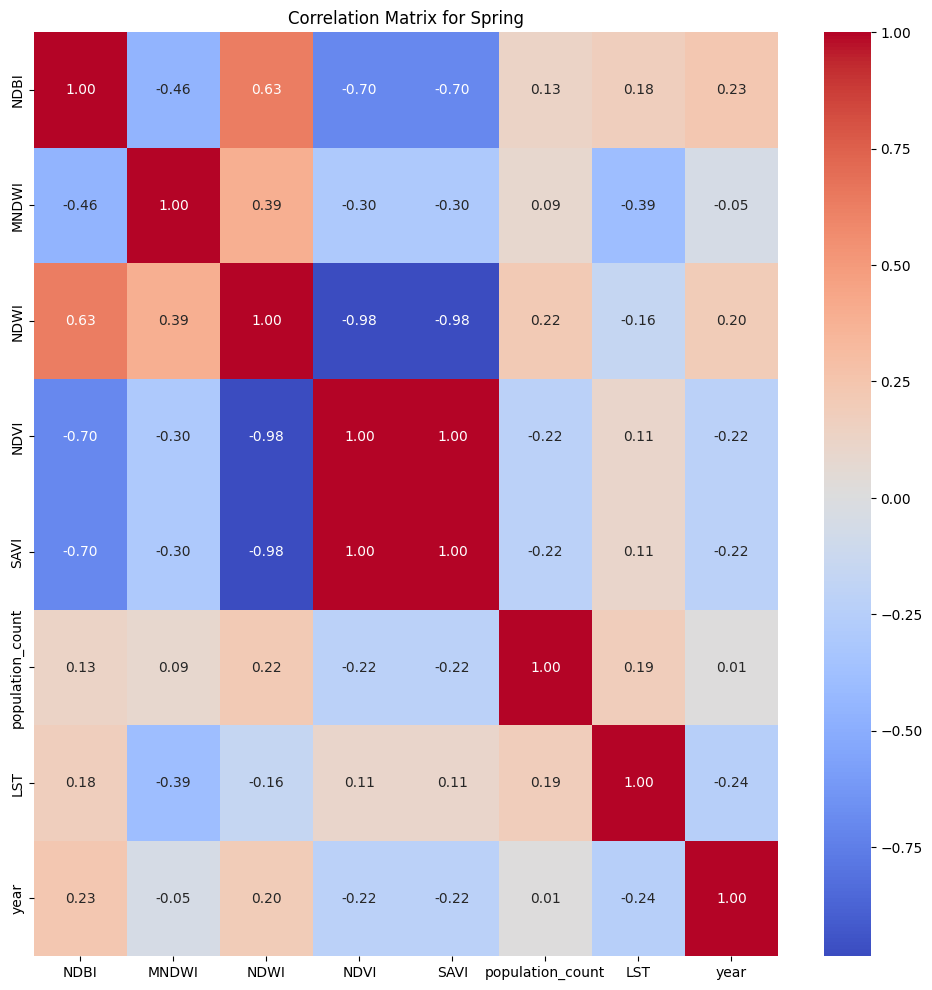

In [11]:
plot_correlation(ds_clipped, season="spring")

In [61]:
temp_a = corr_table[ds_clipped['season_autumn'] == 1]
autumn = temp_spr.drop('season_autumn', axis=1)
autumn.drop('season_spring', axis=1, inplace=True)
autumn.drop('season_winter', axis=1, inplace=True)
autumn.drop('season_summer', axis=1, inplace=True)

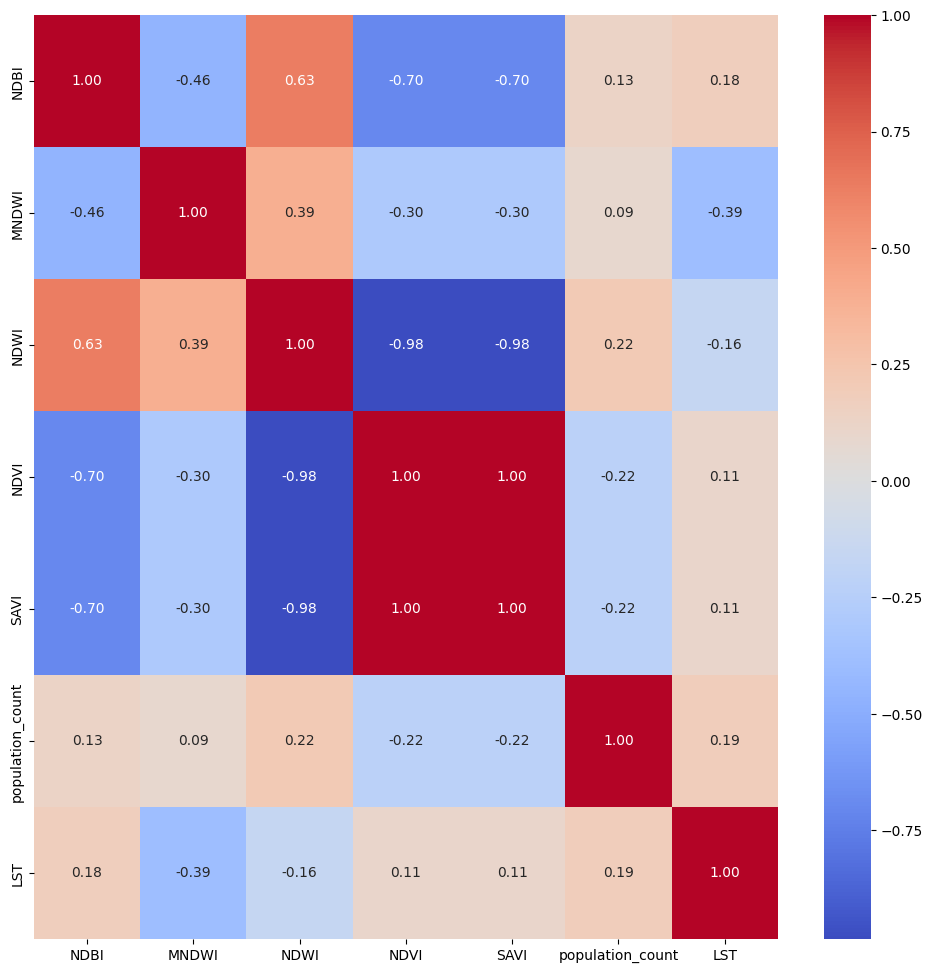

In [62]:
plot_correlation(autumn)

### The total correlation 

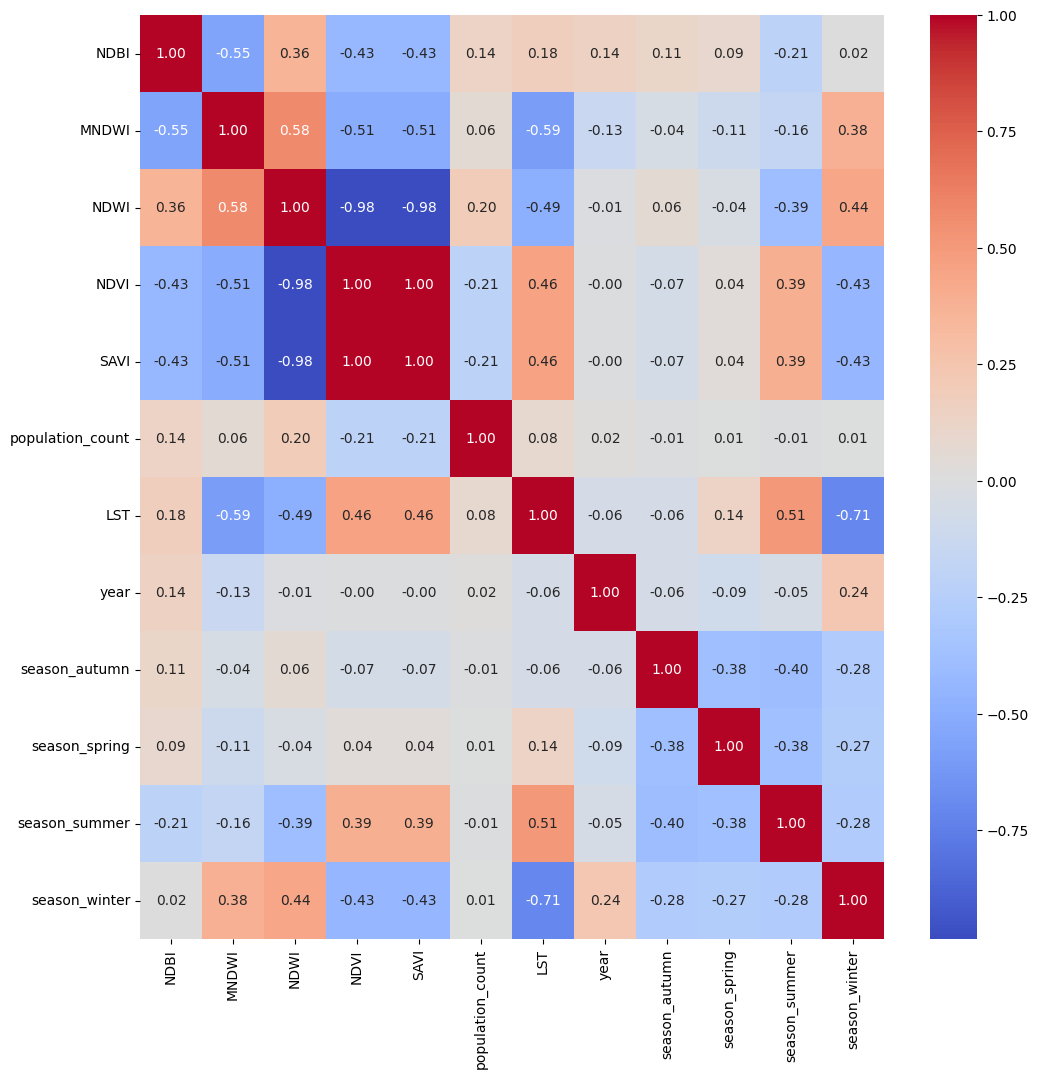

: 

In [63]:
plot_correlation(ds_clipped)